In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Reading and Basic Analysis

In [92]:
data = pd.read_csv('/content/medical_examination.csv')
data.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.nunique()

,0
id,70000
age,8076
sex,3
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


###Validating Data

In [93]:
data['overweight'] = ((data['weight'] / (data['height'] / 100)**2) > 25).astype(int)
data['cholesterol'] = (data['cholesterol'] != 1).astype(int)
data['gluc'] = (data['gluc'] != 1).astype(int)
data['inactive'] = (data['active'] != 1).astype(int)
data = data.drop('active', axis=1)
data.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,overweight,inactive
0,0,18393,2,168,62.0,110,80,0,0,0,0,0,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,1,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1


###Preparing data for plot

In [94]:
cardio_factor_columns = ['cholesterol', 'gluc', 'smoke', 'inactive', 'overweight']
data_melt = data.melt(id_vars='cardio', value_vars=cardio_factor_columns)
data_melt.sample(5)

,cardio,variable,value
7604,1,cholesterol,0
112143,0,gluc,0
219624,1,inactive,1
138260,0,gluc,0
340337,1,overweight,1


In [95]:
data_grouped = data_melt.groupby(['cardio', 'variable']).value_counts()
data_grouped

cardio  variable     value
0       cholesterol  0        29330
                     1         5691
        gluc         0        30894
                     1         4127
        inactive     0        28643
                     1         6378
        overweight   1        19106
                     0        15915
        smoke        0        31781
                     1         3240
1       cholesterol  0        23055
                     1        11924
        gluc         0        28585
                     1         6394
        inactive     0        27618
                     1         7361
        overweight   1        24440
                     0        10539
        smoke        0        32050
                     1         2929
Name: count, dtype: int64

In [96]:
data_cat_plot = data_grouped.reset_index()
data_cat_plot['value'] = data_cat_plot['value'].astype(str)
data_cat_plot

,cardio,variable,value,count
0,0,cholesterol,0,29330
1,0,cholesterol,1,5691
2,0,gluc,0,30894
3,0,gluc,1,4127
4,0,inactive,0,28643
5,0,inactive,1,6378
6,0,overweight,1,19106
7,0,overweight,0,15915
8,0,smoke,0,31781
9,0,smoke,1,3240


###Creating categorical plot

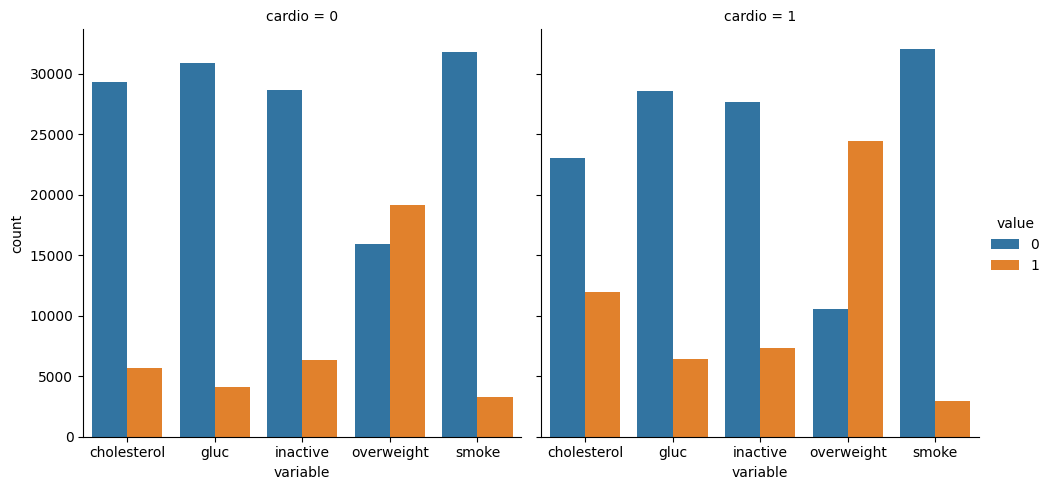

In [97]:
sns.catplot(data_cat_plot, x='variable', y='count', hue='value', kind='bar', col='cardio')

###Preparing data for heatmap

In [98]:
data_clear = data[
                    (data['ap_lo'] >= data['ap_lo'].quantile(0.025)) &
                    (data['ap_lo'] <= data['ap_lo'].quantile(0.975)) &
                    (data['ap_hi'] >= data['ap_hi'].quantile(0.025)) &
                    (data['ap_hi'] <= data['ap_hi'].quantile(0.975)) &
                    (data['ap_lo'] <= data['ap_hi']) &
                    (data['height'] >= data['height'].quantile(0.025)) &
                    (data['height'] <= data['height'].quantile(0.975)) &
                    (data['weight'] >= data['weight'].quantile(0.025)) &
                    (data['weight'] <= data['weight'].quantile(0.975))].drop(['id', 'weight'], axis=1)
data_clear.describe()

,age,sex,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,overweight,inactive
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,19476.633041,1.347579,164.538645,126.149736,81.148558,0.242642,0.145628,0.085868,0.052231,0.491685,0.620045,0.196500
std,2459.569651,0.476515,6.843466,14.302501,8.325156,0.428684,0.352736,0.280171,0.222494,0.499935,0.485379,0.397355
min,10798.000000,1.000000,150.000000,100.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17692.250000,1.000000,160.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19708.000000,1.000000,165.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,169.000000,140.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,23713.000000,3.000000,180.000000,170.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
data_corr = data_clear.corr()
data_corr

,age,sex,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,overweight,inactive
age,1.000000,-0.023575,-0.081700,0.205387,0.149401,0.127704,0.085986,-0.047510,-0.028323,0.238567,0.088496,0.012051
sex,-0.023575,1.000000,0.502421,0.045818,0.050381,-0.040427,-0.022730,0.336012,0.167955,-0.004049,-0.053760,-0.007321
height,-0.081700,0.502421,1.000000,-0.008711,0.009178,-0.065196,-0.031404,0.185522,0.088991,-0.029358,-0.151768,0.006029
ap_hi,0.205387,0.045818,-0.008711,1.000000,0.696238,0.188312,0.089849,0.020496,0.026291,0.429691,0.187453,-0.002211
ap_lo,0.149401,0.050381,0.009178,0.696238,1.000000,0.147656,0.069197,0.019275,0.028560,0.326547,0.167755,-0.000576
cholesterol,0.127704,-0.040427,-0.065196,0.188312,0.147656,1.000000,0.385062,0.012143,0.036164,0.201882,0.126611,-0.002203
gluc,0.085986,-0.022730,-0.031404,0.089849,0.069197,0.385062,1.000000,-0.003804,0.012368,0.086275,0.086471,0.010480
smoke,-0.047510,0.336012,0.185522,0.020496,0.019275,0.012143,-0.003804,1.000000,0.342145,-0.022715,-0.002618,-0.026442
alco,-0.028323,0.167955,0.088991,0.026291,0.028560,0.036164,0.012368,0.342145,1.000000,-0.013386,0.023863,-0.025371
cardio,0.238567,-0.004049,-0.029358,0.429691,0.326547,0.201882,0.086275,-0.022715,-0.013386,1.000000,0.138113,0.038424


In [123]:
mask_eye = np.eye(12, dtype=bool)
mask_triu = np.triu(np.ones_like(data_corr, dtype=bool))

<Axes: >

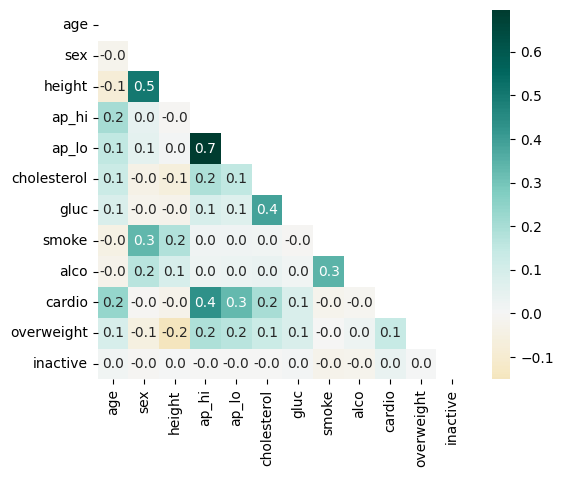

In [125]:
sns.heatmap(data_corr, annot=True, fmt='.1f', cmap='BrBG', square=True, center=0, mask=mask_triu)